#### Practice Project - 5

# Titanic Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [391]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings 
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### about columns
* survived - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [207]:
# checking nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* i see there are 177, 678,2 nulls are present in Age, Cabin, Embarked respectively

In [208]:
# checking duplicates
df.duplicated().sum()

0

* No duplicate rows

In [209]:
# checking empty rows
df.loc[df['Survived']==" "]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


* no empty row in survived column

In [210]:
# stats
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [211]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
# filling nulls
df['Age'] = df['Age'].fillna(df['Age'].median())

In [213]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [214]:
# checking value count in target column
df.Survived.value_counts(0)

0    549
1    342
Name: Survived, dtype: int64

In [215]:
# droping passengerid and name as they are not needed and cabin as it contain lots of null values
df = df.drop(columns = ['Name','PassengerId','Cabin'],axis=1)

In [216]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [217]:
# converting string to number
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df2 = lab_enc.fit_transform(df['Sex'])
pd.Series(df2)
df['Sex'] = df2
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,S
887,1,1,0,19.0,0,0,112053,30.0000,S
888,0,3,0,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,1,26.0,0,0,111369,30.0000,C


In [218]:
lab_enc = LabelEncoder()
df3 = lab_enc.fit_transform(df['Embarked'])
pd.Series(df3)
df['Embarked'] = df3
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35.0,1,0,113803,53.1000,2
4,0,3,1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,2
887,1,1,0,19.0,0,0,112053,30.0000,2
888,0,3,0,28.0,1,2,W./C. 6607,23.4500,2
889,1,1,1,26.0,0,0,111369,30.0000,0


In [219]:
# checking unique value in ticket
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [220]:
# conver ticket into int
lab_enc = LabelEncoder()
df4 = lab_enc.fit_transform(df['Ticket'])
pd.Series(df4)
df['Ticket'] = df4
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


* Now our data is either float or int

In [221]:
# checking outliers and correlation and skewness

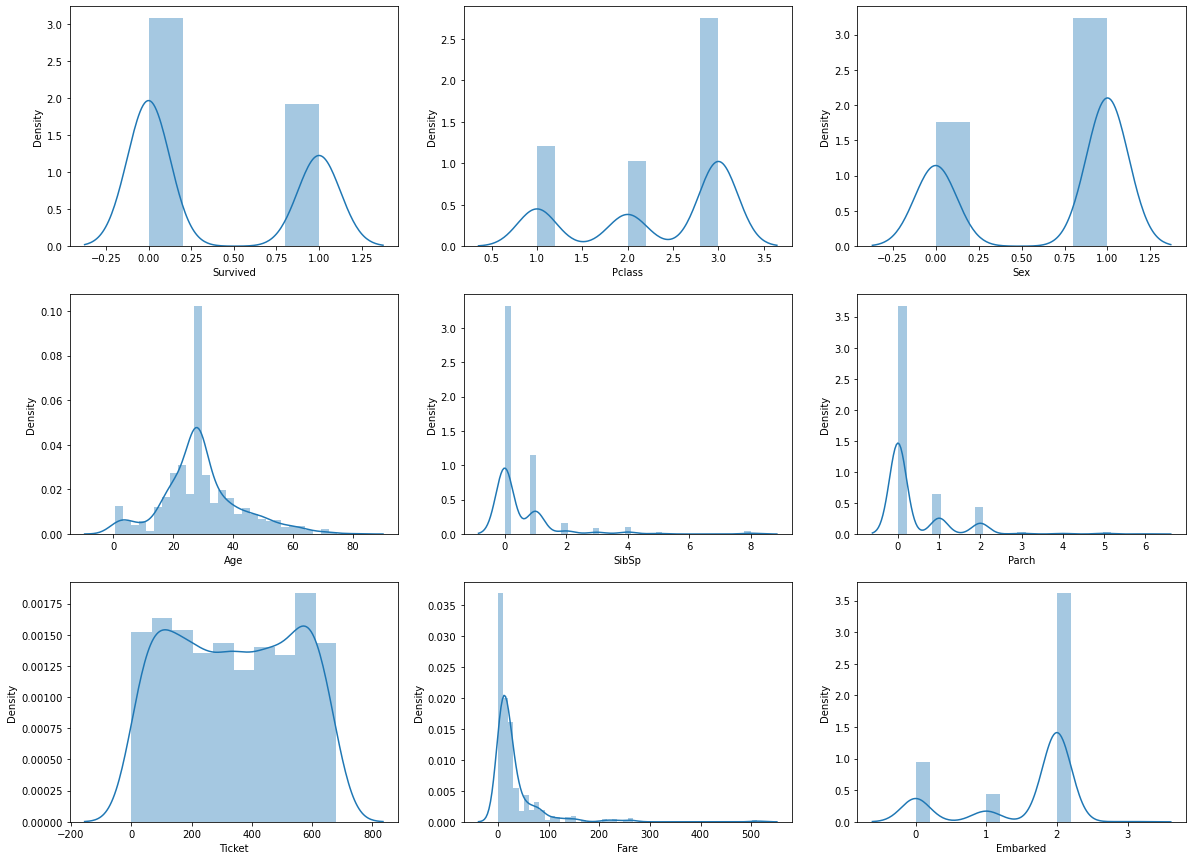

In [222]:
# checking skewness
plt.figure(figsize=(20,15))
plot = 1
for col in df:
    if plot<=9:
        ax = plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
    plot+=1
plt.show()    

* i can see "Fare" is skewed right and "age" can't be 0 and SibSp, Parch are also skewed

In [223]:
# checking outliers

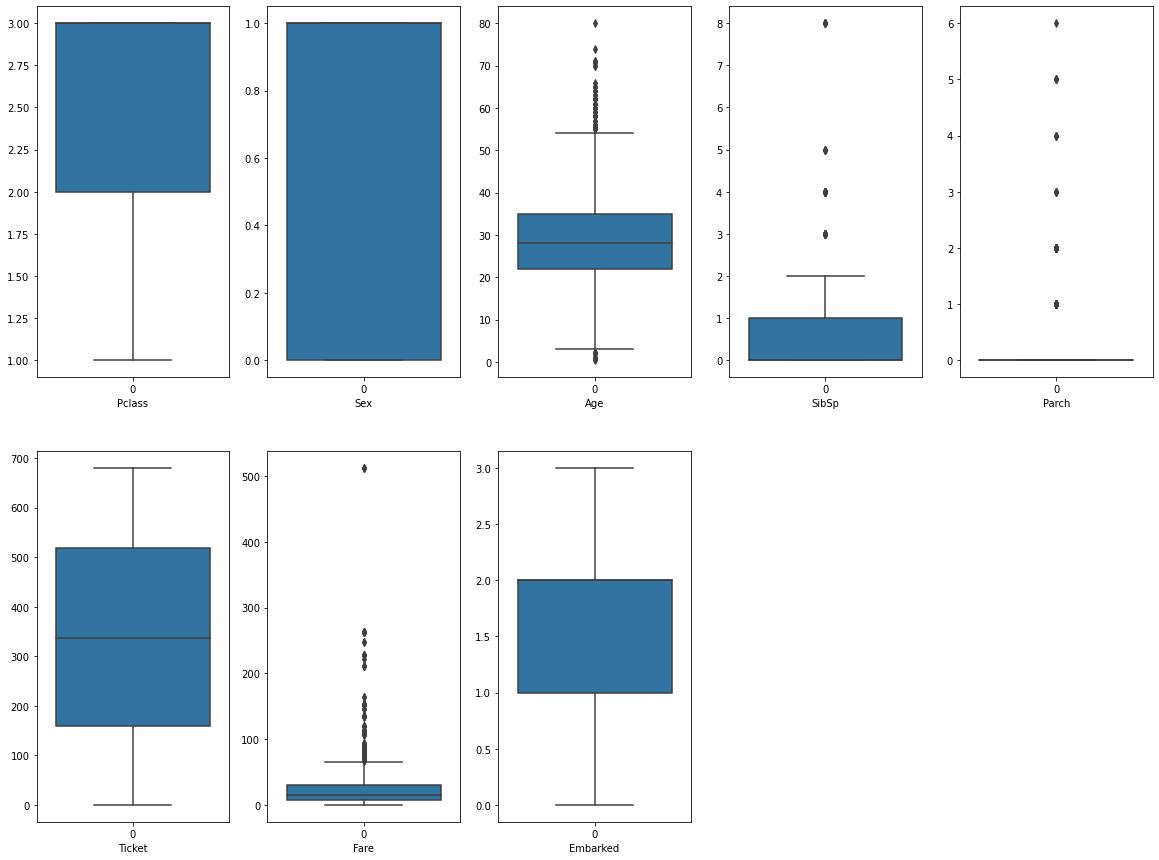

In [224]:
# checking outliers
df1 = df.drop(columns=['Survived'])
plt.figure(figsize=(20,15))
point = 1
for column in df1:
    if point<=8:
        plt.subplot(2,5,point)
        ax = sns.boxplot(data = df1[column])
        plt.xlabel(column,fontsize=10)
    point+=1
plt.show()

* i see there are outliers in 4 columns

In [225]:
# outlier removing unsing z score for Fare and age
from scipy.stats import zscore
z_score = zscore(df[['Age','Fare']])
abs_z_score = np.abs(z_score)

F_E = (abs_z_score < 3).all(axis=1)
df = df[F_E]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


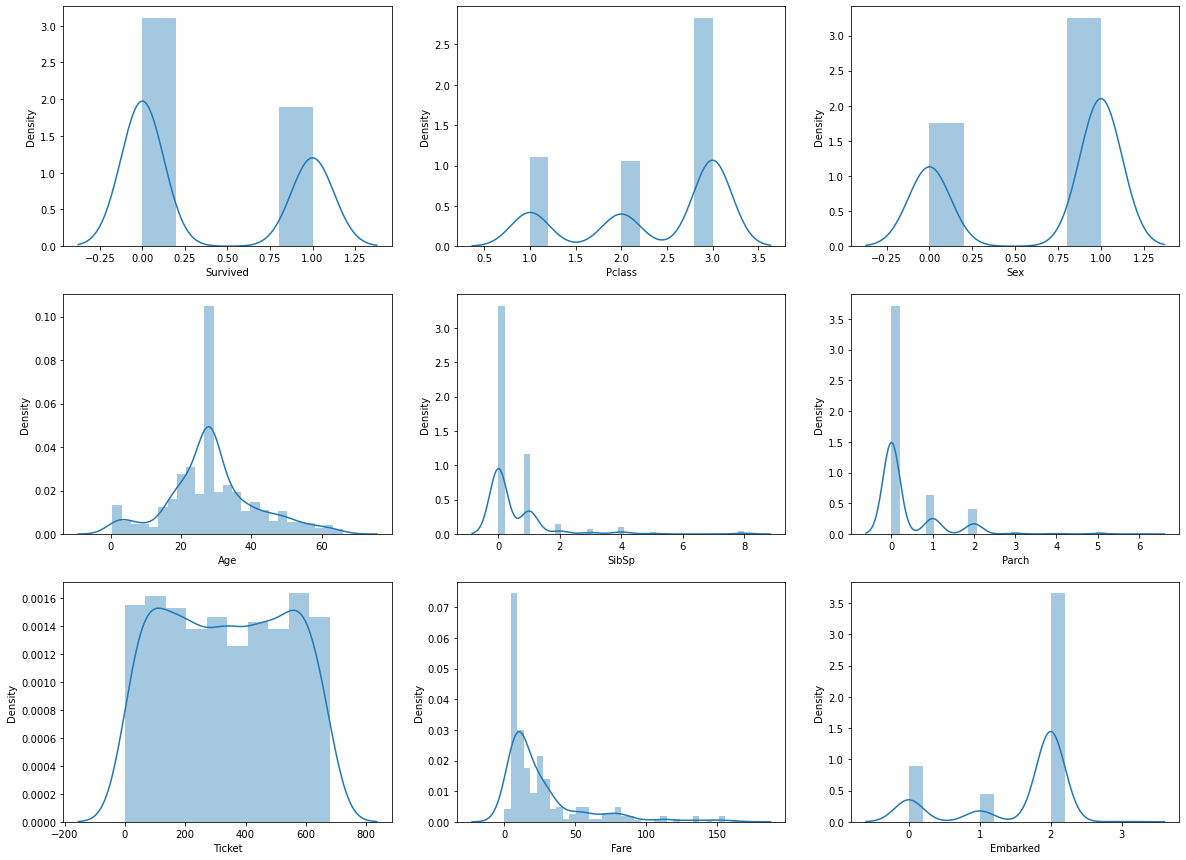

In [226]:
# checking skewness
plt.figure(figsize=(20,15))
plot = 1
for col in df:
    if plot<=9:
        ax = plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
    plot+=1
plt.show()

In [227]:
# age can't be zero do drop those row where age is very less
df= df[(df['Age']>=6)]

In [228]:
# its very rare to see siblings more than 5 so, i am removing which are more than that
df = df[(df['SibSp']<5)]

In [229]:
# its very rare to see parents more than 2 so, i am removing which are more than 3
df = df[(df['Parch']<3)]

In [230]:
df.shape

(795, 9)

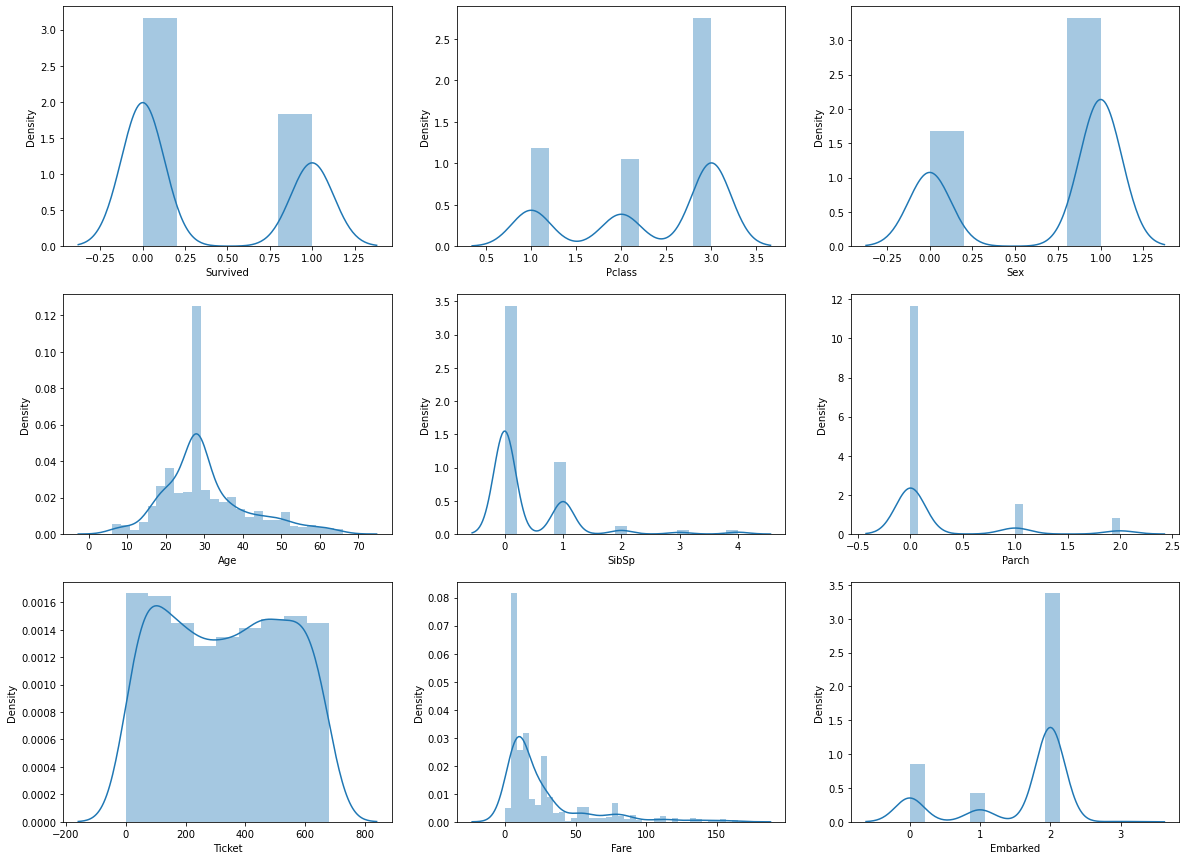

In [231]:
# checking skewness
plt.figure(figsize=(20,15))
plot = 1
for col in df:
    if plot<=9:
        ax = plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
    plot+=1
plt.show()

Checking correlation

In [232]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.343684,-0.571243,0.017483,0.030322,0.129103,-0.158865,0.344799,-0.150748
Pclass,-0.343684,1.000000,0.154985,-0.376640,-0.008997,-0.064004,0.351397,-0.687856,0.133019
Sex,-0.571243,0.154985,1.000000,0.061211,-0.168251,-0.254881,0.067296,-0.256420,0.102478
Age,0.017483,-0.376640,0.061211,1.000000,-0.143567,-0.131856,-0.127198,0.196430,-0.000445
SibSp,0.030322,-0.008997,-0.168251,-0.143567,1.000000,0.355398,0.004118,0.229600,-0.000504
Parch,0.129103,-0.064004,-0.254881,-0.131856,0.355398,1.000000,-0.016787,0.250516,-0.003487
Ticket,-0.158865,0.351397,0.067296,-0.127198,0.004118,-0.016787,1.000000,-0.141773,0.027731
Fare,0.344799,-0.687856,-0.256420,0.196430,0.229600,0.250516,-0.141773,1.000000,-0.202321
Embarked,-0.150748,0.133019,0.102478,-0.000445,-0.000504,-0.003487,0.027731,-0.202321,1.000000


<AxesSubplot:>

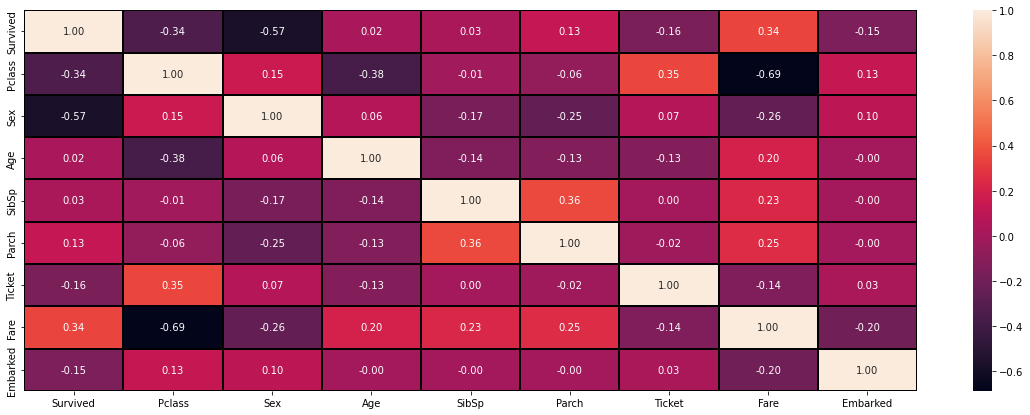

In [233]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidths=0.1)

* i see Age and SibSp are very less correlated with target so i will drop them

In [234]:
x = df.drop(columns=['Age','SibSp','Survived'])
y = df.Survived

In [235]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [236]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Model Buliding

In [237]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 348)

### Logistic regression

In [238]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [239]:
# one function to call as many as times to check accuracy score of different model
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==================== Train Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n===================== Test Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test, pred,digits=2))

In [244]:
# call the function and pass dataset to check the train and test score
metric_score(log_reg,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(log_reg,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :80.37%

===================== Test Result =======================
Accuracy score :83.92%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       135
           1       0.75      0.75      0.75        64

    accuracy                           0.84       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.84      0.84      0.84       199



* i can see model accuracy is 84% and f1 score is 88% for 0(no survived) and 75% for 0(survived). which is very good 
* lets try to increase accuracy usning hyper parameter tuning

###  Hyperparameter Tuning

In [245]:
drid_param = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]
}

In [247]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=log_reg,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [248]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [249]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 0.012742749857031334, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [269]:
# training data again with tuned parameter
log_reg = LogisticRegression(C=0.012742749857031334,max_iter=100,penalty='l2',solver='lbfgs')
log_reg.fit(x_train,y_train)

LogisticRegression(C=0.012742749857031334)

In [270]:
# checking the accuracy after tuning
metric_score(log_reg,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(log_reg,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :80.03%

===================== Test Result =======================
Accuracy score :84.92%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       135
           1       0.83      0.67      0.74        64

    accuracy                           0.85       199
   macro avg       0.84      0.80      0.82       199
weighted avg       0.85      0.85      0.84       199



* as i can it learned nearly same and giving more accuracy that is 85%

###  Decision Tree

In [274]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [275]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :99.33%

===================== Test Result =======================
Accuracy score :82.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       135
           1       0.69      0.81      0.75        64

    accuracy                           0.82       199
   macro avg       0.80      0.82      0.81       199
weighted avg       0.84      0.82      0.83       199



* Decision Tree learns more than but giving only giving 82% accuracy 

#### Hyperparameter Tuning

In [282]:
drid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,20),
    'min_samples_leaf': range(2,20),
    'min_samples_split': range(3,20),
    'max_leaf_nodes': range(5,20)
}

In [283]:
grid_search = GridSearchCV(estimator=clf,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [284]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              max_leaf_nodes=5,
                                              min_samples_leaf=9,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 20),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(3, 20)})

In [285]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 18, 'min_samples_split': 3}


In [288]:
# initaiting DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=3,max_depth=10,min_samples_leaf=18,max_leaf_nodes=5)

# train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       min_samples_leaf=18, min_samples_split=3)

In [289]:
# call the function and pass dataset to check the train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :81.54%

===================== Test Result =======================
Accuracy score :85.43%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       135
           1       0.84      0.67      0.75        64

    accuracy                           0.85       199
   macro avg       0.85      0.81      0.82       199
weighted avg       0.85      0.85      0.85       199



* now model is trained only 81% and giving 85% accuracy f1 score is also better than logistic regression model

### AdaBoost

In [291]:
from sklearn.ensemble import AdaBoostClassifier

In [293]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [294]:
metric_score(ada,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(ada,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :83.05%

===================== Test Result =======================
Accuracy score :84.42%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88       135
           1       0.71      0.86      0.78        64

    accuracy                           0.84       199
   macro avg       0.82      0.85      0.83       199
weighted avg       0.86      0.84      0.85       199



* it is giving accuracy 84% and it learned 83% great and f1 score is also good . 

#### Hyperparameter Tuning

In [296]:
from sklearn.model_selection import GridSearchCV

In [310]:
params = {'n_estimators':[10,20,47,50,60,70,90,100], 'learning_rate':[0.25,0.30,0.40]}

In [311]:
grid_srch = GridSearchCV(AdaBoostClassifier(),cv=5,param_grid = params)

In [312]:
grid_srch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.25, 0.3, 0.4],
                         'n_estimators': [10, 20, 47, 50, 60, 70, 90, 100]})

In [313]:
grid_srch.best_estimator_

AdaBoostClassifier(learning_rate=0.3, n_estimators=20)

In [332]:
ada = AdaBoostClassifier(learning_rate=1.0,n_estimators=60)
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=60)

In [333]:
metric_score(ada,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(ada,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :84.23%

===================== Test Result =======================
Accuracy score :84.42%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       135
           1       0.72      0.84      0.78        64

    accuracy                           0.84       199
   macro avg       0.82      0.84      0.83       199
weighted avg       0.86      0.84      0.85       199



* it gives the best result because training and test score are same as whatecer the model learn it gives that

### Knn

In [334]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [335]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [336]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(knn,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :85.74%

===================== Test Result =======================
Accuracy score :82.91%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       135
           1       0.74      0.72      0.73        64

    accuracy                           0.83       199
   macro avg       0.81      0.80      0.80       199
weighted avg       0.83      0.83      0.83       199



#### Hyperparameter tuning

In [348]:
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)

In [349]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8],
                         'n_neighbors': [3, 4, 7, 9, 11, 13]})

In [350]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 7}

In [366]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors=7)

In [367]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

In [368]:
# checking accuracy
metric_score(knn,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(knn,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :83.72%

===================== Test Result =======================
Accuracy score :81.91%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       135
           1       0.73      0.69      0.71        64

    accuracy                           0.82       199
   macro avg       0.79      0.78      0.79       199
weighted avg       0.82      0.82      0.82       199



without tuning it is working better

## SVM

In [369]:
# svm
from sklearn.svm import SVC
svc = SVC()

# model training and score
svc.fit(x_train,y_train)

# call the function
# call the function and pass the dataset
metric_score(svc,x_train,x_test,y_train,y_test, train=True) # training score
metric_score(svc,x_train,x_test,y_train,y_test, train=False) # testing score


==================== Train Result =======================
Accuracy score :82.72%

===================== Test Result =======================
Accuracy score :84.42%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       135
           1       0.79      0.70      0.74        64

    accuracy                           0.84       199
   macro avg       0.83      0.81      0.82       199
weighted avg       0.84      0.84      0.84       199



### Hyperparameter tuning

In [370]:
param_grid = {'C':[1,5,10,20],
              'gamma':[0.001,0.01,0.2,0.002]
             }
gridsearch = GridSearchCV(svc, param_grid)

gridsearch.fit(x_train,y_train)

# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.01}

In [389]:
# svm model training with new params and print score
svc = SVC(C=16,gamma=0.25)

# model training and score
svc.fit(x_train,y_train)

# call the function
# call the function and pass the dataset
metric_score(svc,x_train,x_test,y_train,y_test, train=True) # training score
metric_score(svc,x_train,x_test,y_train,y_test, train=False) # testing score



==================== Train Result =======================
Accuracy score :85.07%

===================== Test Result =======================
Accuracy score :85.93%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       135
           1       0.80      0.75      0.77        64

    accuracy                           0.86       199
   macro avg       0.84      0.83      0.84       199
weighted avg       0.86      0.86      0.86       199



giving good result after tuning

# Comparing models 

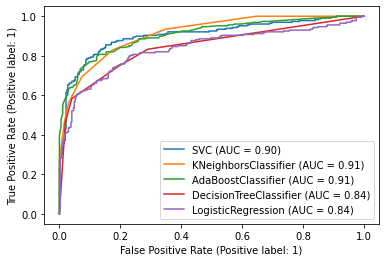

In [394]:
# how well our model works on training data
disp = plot_roc_curve(svc,x_train,y_train)

plot_roc_curve(knn,x_train,y_train,ax = disp.ax_)  # axis with confusion matrix

plot_roc_curve(ada,x_train,y_train,ax = disp.ax_)

plot_roc_curve(clf,x_train,y_train,ax = disp.ax_)

plot_roc_curve(log_reg,x_train,y_train,ax = disp.ax_)

plt.legend(prop='size=10', loc='lower right')

plt.show()

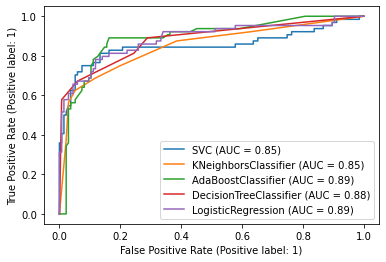

In [395]:
# how well our model works on test data
disp = plot_roc_curve(svc,x_test,y_test)

plot_roc_curve(knn,x_test,y_test,ax = disp.ax_)  # axis with confusion matrix

plot_roc_curve(ada,x_test,y_test,ax = disp.ax_)

plot_roc_curve(clf,x_test,y_test,ax = disp.ax_)

plot_roc_curve(log_reg,x_test,y_test,ax = disp.ax_)

plt.legend(prop='size=10', loc='lower right')

plt.show()

* I will go with logisticRegression model as it learns only 84% and giving output 89% so, for me it is the best model for this dataset

In [396]:
# saving the best model
import pickle
filename = 'titanic.Lreg'
pickle.dump(log_reg, open(filename,'wb'))